### Clean data file into fit() ready spark dataframe

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from src_2.submit import compute_score

In [5]:
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.ml.recommendation import ALS

# # Setup a SparkSession
# spark = SparkSession.builder.getOrCreate()

In [19]:
repos = pd.read_csv('data/active_projects.csv', sep='\t')
repos.info()
repos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228180 entries, 0 to 228179
Data columns (total 7 columns):
id             228180 non-null int64
url            228180 non-null object
owner_id       228180 non-null int64
name           228174 non-null object
language       228180 non-null object
created_at     228180 non-null object
forked_from    228180 non-null object
dtypes: int64(2), object(5)
memory usage: 12.2+ MB


,id,url,owner_id,name,language,created_at,forked_from
0,27750972,https://api.github.com/repos/Electronics-Ninja...,7259404,BBB_python,Python,2015-10-22 01:13:11,\N
1,28683824,https://api.github.com/repos/d0u9/.dot,8629487,.dot,VimL,2015-11-29 10:34:32,\N
2,1808,https://api.github.com/repos/candlepin/subscri...,9548,subscription-manager,Python,2012-05-17 16:13:30,\N
3,28922584,https://api.github.com/repos/greenalpha/utxx,10557672,utxx,C++,2015-11-17 16:14:36,2149824
4,9884164,https://api.github.com/repos/endlessm/linux,2234193,linux,C,2014-05-20 18:43:21,\N


In [20]:
users = pd.read_csv('data/active_users.csv', sep='\t')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159321 entries, 0 to 159320
Data columns (total 9 columns):
id              159321 non-null int64
login           159321 non-null object
company         159289 non-null object
created_at      159321 non-null object
type            159321 non-null object
country_code    159321 non-null object
state           159321 non-null object
city            159321 non-null object
location        159319 non-null object
dtypes: int64(1), object(8)
memory usage: 10.9+ MB


,id,login,company,created_at,type,country_code,state,city,location
0,7259404,Electronics-Ninja,\N,2015-03-05 02:56:43,USR,\N,\N,\N,\N
1,8629487,d0u9,▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒,2014-03-23 12:52:20,USR,\N,\N,\N,░░░░░░░░░░░░░░░
2,9548,candlepin,\N,2012-05-17 14:02:36,ORG,\N,\N,\N,\N
3,10557672,greenalpha,\N,2015-11-11 02:05:28,USR,\N,\N,\N,\N
4,2234193,endlessm,\N,2012-07-06 04:09:10,ORG,\N,\N,\N,\N


In [42]:
starred = pd.read_csv('data/active_stars.csv', parse_dates=['created_at'], sep='\t')
starred.info()
starred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311239 entries, 0 to 6311238
Data columns (total 3 columns):
repo_id       int64
user_id       int64
created_at    datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 144.5 MB


,repo_id,user_id,created_at
0,28683824,1329957,2015-12-29 15:34:15
1,28683824,1804898,2016-04-14 09:47:01
2,28683824,2000339,2016-02-01 09:37:06
3,28683824,2815290,2016-06-08 16:13:31
4,28683824,3139662,2017-04-18 06:51:21


In [43]:
# Forgot to remove USERS who don't exist in my graph before exporting to csv from mySQL
new_starred = starred.merge(users, left_on='user_id', right_on='id')
new_starred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895822 entries, 0 to 895821
Data columns (total 12 columns):
repo_id         895822 non-null int64
user_id         895822 non-null int64
created_at_x    895822 non-null datetime64[ns]
id              895822 non-null int64
login           895822 non-null object
company         895630 non-null object
created_at_y    895822 non-null object
type            895822 non-null object
country_code    895822 non-null object
state           895822 non-null object
city            895822 non-null object
location        895798 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 88.8+ MB


In [44]:
new_starred = new_starred.merge(repos, left_on='repo_id', right_on='id')
new_starred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895822 entries, 0 to 895821
Data columns (total 19 columns):
repo_id         895822 non-null int64
user_id         895822 non-null int64
created_at_x    895822 non-null datetime64[ns]
id_x            895822 non-null int64
login           895822 non-null object
company         895630 non-null object
created_at_y    895822 non-null object
type            895822 non-null object
country_code    895822 non-null object
state           895822 non-null object
city            895822 non-null object
location        895798 non-null object
id_y            895822 non-null int64
url             895822 non-null object
owner_id        895822 non-null int64
name            895674 non-null object
language        895822 non-null object
created_at      895822 non-null object
forked_from     895822 non-null object
dtypes: datetime64[ns](1), int64(5), object(13)
memory usage: 136.7+ MB


In [45]:
new_starred.columns

Index([u'repo_id', u'user_id', u'created_at_x', u'id_x', u'login', u'company',
       u'created_at_y', u'type', u'country_code', u'state', u'city',
       u'location', u'id_y', u'url', u'owner_id', u'name', u'language',
       u'created_at', u'forked_from'],
      dtype='object')

In [46]:
new_starred = new_starred.drop([u'id_x', u'company',
       u'created_at_y', u'country_code', u'state', u'city',
       u'location', u'id_y', u'owner_id', u'name',
       u'created_at', u'forked_from'], axis=1)
new_starred = new_starred.rename(columns={'created_at_x': 'created_at'})
new_starred.head()

,repo_id,user_id,created_at,login,type,url,language
0,28683824,2815290,2016-06-08 16:13:31,TomShine,USR,https://api.github.com/repos/d0u9/.dot,VimL
1,28683824,3152387,2016-03-21 06:16:58,sundiontheway,USR,https://api.github.com/repos/d0u9/.dot,VimL
2,28683824,8629487,2015-11-29 12:19:12,d0u9,USR,https://api.github.com/repos/d0u9/.dot,VimL
3,26166110,2815290,2015-09-30 07:43:07,TomShine,USR,https://api.github.com/repos/hashicorp/nomad,Go
4,26166110,4268116,2015-09-28 19:51:53,gunjan5,USR,https://api.github.com/repos/hashicorp/nomad,Go


In [48]:
# new_starred.to_pickle('data/pickled/active_stars.pkl')

In [49]:
starred = pd.read_pickle('data/pickled/active_stars.pkl')
starred.info()
starred.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895822 entries, 0 to 895821
Data columns (total 7 columns):
repo_id       895822 non-null int64
user_id       895822 non-null int64
created_at    895822 non-null datetime64[ns]
login         895822 non-null object
type          895822 non-null object
url           895822 non-null object
language      895822 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 54.7+ MB


,repo_id,user_id,created_at,login,type,url,language
0,28683824,2815290,2016-06-08 16:13:31,TomShine,USR,https://api.github.com/repos/d0u9/.dot,VimL
1,28683824,3152387,2016-03-21 06:16:58,sundiontheway,USR,https://api.github.com/repos/d0u9/.dot,VimL
2,28683824,8629487,2015-11-29 12:19:12,d0u9,USR,https://api.github.com/repos/d0u9/.dot,VimL
3,26166110,2815290,2015-09-30 07:43:07,TomShine,USR,https://api.github.com/repos/hashicorp/nomad,Go
4,26166110,4268116,2015-09-28 19:51:53,gunjan5,USR,https://api.github.com/repos/hashicorp/nomad,Go


In [50]:
starred['starred'] = 1

In [12]:
# spark_request_df = spark.createDataFrame(pd_requests_df)
# spark_training_df = spark.createDataFrame(pd_training_df)
# #spark_request_df.show()

In [13]:
# train, test = spark.createDataFrame(df).randomSplit([0.8, 0.2], seed=52)

In [51]:
starred = starred.sort_values('created_at')
starred.head()

,repo_id,user_id,created_at,login,type,url,language,starred
507397,12031,889397,2008-02-08 02:54:32,cdcarter,USR,https://api.github.com/repos/rubinius/rubinius,Ruby,1
884659,52574448,889397,2008-02-08 03:54:32,cdcarter,USR,https://api.github.com/repos/SalesforceFoundat...,\N,1
507175,12031,17898,2008-02-14 16:54:50,gnufied,USR,https://api.github.com/repos/rubinius/rubinius,Ruby,1
507346,12031,25789,2008-02-21 04:29:17,Sutto,USR,https://api.github.com/repos/rubinius/rubinius,Ruby,1
507241,12031,10942,2008-02-25 03:32:26,tarcieri,USR,https://api.github.com/repos/rubinius/rubinius,Ruby,1


In [52]:
starred.tail()

,repo_id,user_id,created_at,login,type,url,language,starred
59368,3231,34365666,2017-06-30 23:48:26,Qwartz2,USR,https://api.github.com/repos/robbyrussell/oh-m...,Shell,1
539367,16657452,1240204,2017-06-30 23:49:28,Randl,USR,https://api.github.com/repos/orlp/pdqsort,C++,1
656740,46961268,8716720,2017-06-30 23:49:46,CeramicSkate0,USR,https://api.github.com/repos/manwhoami/OSXChro...,Python,1
354576,29131071,12527376,2017-06-30 23:58:39,AlexiaJM,USR,https://api.github.com/repos/karpathy/arxiv-sa...,Python,1
343169,22218658,9338700,2017-06-30 23:59:48,josephpd3,USR,https://api.github.com/repos/jupyter/docker-st...,Makefile,1


In [53]:
#20% remaining rows
starred.shape[0] - int(starred.shape[0] * .8)

179165

In [54]:
# 80% of starred df (ordered by timestamp) for train set
up_to = int(starred.shape[0]*.80)
up_to

716657

In [55]:
train_starred = starred.iloc[:up_to,:]
train_starred.tail()

,repo_id,user_id,created_at,login,type,url,language,starred
303662,29073150,3091761,2017-01-27 04:32:26,shen-xianpeng,USR,https://api.github.com/repos/anishathalye/neur...,Python,1
728730,27645585,2605600,2017-01-27 04:33:03,jamesdbrock,USR,https://api.github.com/repos/boostorg/hana,C++,1
251377,11721331,226571,2017-01-27 04:34:41,lorddaedra,USR,https://api.github.com/repos/matrix-org/synapse,Python,1
420419,13447331,3900498,2017-01-27 04:36:26,UnixMonky,USR,https://api.github.com/repos/nodemcu/nodemcu-f...,C,1
571302,15771614,641683,2017-01-27 04:40:18,user01,USR,https://api.github.com/repos/Calysto/matlab_ke...,Jupyter Notebook,1


In [56]:
test_starred = starred.iloc[up_to:,:]
test_starred.head()

,repo_id,user_id,created_at,login,type,url,language,starred
667901,55567488,6694284,2017-01-27 04:46:39,CaiJiJi,USR,https://api.github.com/repos/lijiejie/ds_store...,Python,1
348434,1282,13665131,2017-01-27 04:51:12,tarvos21,USR,https://api.github.com/repos/Pylons/pyramid,Python,1
644503,16356,6806774,2017-01-27 04:53:38,acro5piano,USR,https://api.github.com/repos/phalcon/cphalcon,PHP,1
796058,12651428,11997,2017-01-27 04:54:28,alias1,USR,https://api.github.com/repos/Yubico/u2fval,Python,1
820877,394885,9279104,2017-01-27 05:00:32,nilsdeppe,USR,https://api.github.com/repos/p12tic/cppreferen...,Python,1


In [57]:
#Check split count
test_starred.info()
train_starred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179165 entries, 667901 to 343169
Data columns (total 8 columns):
repo_id       179165 non-null int64
user_id       179165 non-null int64
created_at    179165 non-null datetime64[ns]
login         179165 non-null object
type          179165 non-null object
url           179165 non-null object
language      179165 non-null object
starred       179165 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 12.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 716657 entries, 507397 to 571302
Data columns (total 8 columns):
repo_id       716657 non-null int64
user_id       716657 non-null int64
created_at    716657 non-null datetime64[ns]
login         716657 non-null object
type          716657 non-null object
url           716657 non-null object
language      716657 non-null object
starred       716657 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 49.2+ MB


In [58]:
train_starred.to_pickle('data/pickled/train_starred.pkl')
test_starred.to_pickle('data/pickled/test_starred.pkl')

## Run ALS on just the Star data

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS

#import src_2.evaluate as evaluate

# Setup a SparkSession
spark = SparkSession.builder.getOrCreate()

# # Convert a Pandas DF to a Spark DF
# spark_df = spark.createDataFrame(pandas_df) 

# # Convert a Spark DF to a Pandas DF
# pandas_df = spark_df.toPandas()

IllegalArgumentException: u"Error while instantiating 'org.apache.spark.sql.hive.HiveSessionState':"

# UnPickle dataframes

In [1]:
import pandas as pd
import numpy as np
import src.evaluate as evaluate

In [ ]:
#train, test = spark_training_df.randomSplit([0.8, 0.2], seed=427471138)

In [2]:
train_starred = pd.read_pickle('data/pickled/train_starred.pkl')
test_starred = pd.read_pickle('data/pickled/test_starred.pkl')

In [3]:
train_starred.info()
test_starred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716657 entries, 507397 to 571302
Data columns (total 8 columns):
repo_id       716657 non-null int64
user_id       716657 non-null int64
created_at    716657 non-null datetime64[ns]
login         716657 non-null object
type          716657 non-null object
url           716657 non-null object
language      716657 non-null object
starred       716657 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 49.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179165 entries, 667901 to 343169
Data columns (total 8 columns):
repo_id       179165 non-null int64
user_id       179165 non-null int64
created_at    179165 non-null datetime64[ns]
login         179165 non-null object
type          179165 non-null object
url           179165 non-null object
language      179165 non-null object
starred       179165 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 12.3+ MB


## Run small test df on Spark

In [61]:
small_test = test_starred.iloc[:100,:]
small_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 667901 to 622045
Data columns (total 8 columns):
repo_id       100 non-null int64
user_id       100 non-null int64
created_at    100 non-null datetime64[ns]
login         100 non-null object
type          100 non-null object
url           100 non-null object
language      100 non-null object
starred       100 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 7.0+ KB


In [9]:
test_spark_df = spark.createDataFrame(small_test)
test_spark_df.show()

+--------+--------+-------------------+-------+
| repo_id| user_id|         created_at|starred|
+--------+--------+-------------------+-------+
|11750990| 6532782|1483983076000000000|      1|
|   29253|  248011|1483983090000000000|      1|
|12888184|11634827|1483983095000000000|      1|
| 9770717| 7266153|1483983105000000000|      1|
|53787751| 6845189|1483983110000000000|      1|
|30349509| 4745331|1483983133000000000|      1|
|30232738| 1383765|1483983160000000000|      1|
|53787751| 2813487|1483983179000000000|      1|
|37666164| 1621509|1483983187000000000|      1|
|15012233| 1052121|1483983196000000000|      1|
|   46907| 3430339|1483983204000000000|      1|
|12219032|10777273|1483983223000000000|      1|
|22091370| 3496396|1483983253000000000|      1|
|52406965| 1324281|1483983263000000000|      1|
|21382248| 5977639|1483983293000000000|      1|
|     853|  842279|1483983293000000000|      1|
| 3309728|33368236|1483983303000000000|      1|
|21447351| 7266153|1483983340000000000| 

## Run actual test train data

In [5]:
spark_train_stars_df = spark.createDataFrame(train_starred)

In [6]:
spark_test_stars_df = spark.createDataFrame(test_starred)

In [10]:
spark_train_stars_df.show()

+--------+-------+-------------------+---------------+----+--------------------+--------+-------+
| repo_id|user_id|         created_at|          login|type|                 url|language|starred|
+--------+-------+-------------------+---------------+----+--------------------+--------+-------+
|   12031| 889397|1202439272000000000|       cdcarter| USR|https://api.githu...|    Ruby|      1|
|52574448| 889397|1202442872000000000|       cdcarter| USR|https://api.githu...|      \N|      1|
|   12031|  17898|1203008090000000000|        gnufied| USR|https://api.githu...|    Ruby|      1|
|   12031|  25789|1203568157000000000|          Sutto| USR|https://api.githu...|    Ruby|      1|
|   12031|  10942|1203910346000000000|       tarcieri| USR|https://api.githu...|    Ruby|      1|
|   12031|  35126|1204050466000000000|         cypher| USR|https://api.githu...|    Ruby|      1|
|40916741| 401456|1204169012000000000|           dsrw| USR|https://api.githu...|   Shell|      1|
|   12031|  60568|12

In [11]:
spark_test_stars_df.show()

+--------+--------+-------------------+-----------------+----+--------------------+----------+-------+
| repo_id| user_id|         created_at|            login|type|                 url|  language|starred|
+--------+--------+-------------------+-----------------+----+--------------------+----------+-------+
|55567488| 6694284|1485492399000000000|          CaiJiJi| USR|https://api.githu...|    Python|      1|
|    1282|13665131|1485492672000000000|         tarvos21| USR|https://api.githu...|    Python|      1|
|   16356| 6806774|1485492818000000000|       acro5piano| USR|https://api.githu...|       PHP|      1|
|12651428|   11997|1485492868000000000|           alias1| USR|https://api.githu...|    Python|      1|
|  394885| 9279104|1485493232000000000|        nilsdeppe| USR|https://api.githu...|    Python|      1|
|29629404| 2060726|1485493578000000000|           Patola| USR|https://api.githu...|         C|      1|
|   38701|12092442|1485493937000000000|         buhuipao| USR|https://api

In [12]:
als_model = ALS(
    itemCol='repo_id',
    userCol='user_id',
    ratingCol='starred',
    nonnegative=True,    
    regParam=0.1,
    rank=10
    ) 

In [13]:
recommender = als_model.fit(spark_train_stars_df)

In [14]:
predictions = recommender.transform(spark_test_stars_df)

In [15]:
predictions.show()

+-------+--------+-------------------+-------------+----+--------------------+--------+-------+----------+
|repo_id| user_id|         created_at|        login|type|                 url|language|starred|prediction|
+-------+--------+-------------------+-------------+----+--------------------+--------+-------+----------+
|   1088| 1966345|1490671147000000000|    craigwong| USR|https://api.githu...|       C|      1|0.89964926|
|   1088| 6504088|1487783348000000000|ghostwriternr| USR|https://api.githu...|       C|      1|0.89964825|
|   1088|10452600|1489503628000000000|     mike168m| USR|https://api.githu...|       C|      1| 0.8996487|
|   1088|26464620|1488393840000000000|  amitbansal7| USR|https://api.githu...|       C|      1|       NaN|
|   1088|31125242|1493660697000000000|     rmccorm4| USR|https://api.githu...|       C|      1|       NaN|
|   1088| 1383890|1492655096000000000|       Xwoder| USR|https://api.githu...|       C|      1|  0.899648|
|   1088| 8635446|1489621495000000000

In [ ]:
pred_df = predictions.toPandas()

In [20]:
pred_df.sort_values('prediction', ascending=False)

,repo_id,user_id,created_at,login,type,url,language,starred,prediction
153561,18059067,121133,1489510601000000000,SimonEbner,USR,https://api.github.com/repos/fchollet/keras,Python,1,0.902500
53874,31810056,121133,1488213819000000000,SimonEbner,USR,https://api.github.com/repos/tensorflow/models,Python,1,0.902497
64441,40445917,1160385,1487626701000000000,silgon,USR,https://api.github.com/repos/llSourcell/One-Sh...,Python,1,0.902074
56385,19688305,1160385,1486740545000000000,silgon,USR,https://api.github.com/repos/vegasbrianc/docke...,Python,1,0.902065
17647,10412366,30383526,1486755550000000000,cjue,USR,https://api.github.com/repos/FreeOpcUa/freeopcua,C++,1,0.901518
17648,10412366,3944360,1495956582000000000,habedi,USR,https://api.github.com/repos/FreeOpcUa/freeopcua,C++,1,0.901486
17649,10412366,7627650,1498444082000000000,YuehChuan,USR,https://api.github.com/repos/FreeOpcUa/freeopcua,C++,1,0.901462
35749,108908,287007,1495715652000000000,jfloff,USR,https://api.github.com/repos/fogbeam/Quoddy,Groovy,1,0.901445
4119,11388076,30694659,1490778834000000000,jacknlliu,USR,https://api.github.com/repos/rock-simulation/p...,Python,1,0.901234
110627,750,8651447,1494002386000000000,Crobisaur,USR,https://api.github.com/repos/ros/rosdistro,Python,1,0.900545


In [24]:
train_df = spark_train_stars_df.toPandas()
train_df[train_df['user_id'] == 121133]

,repo_id,user_id,created_at,login,type,url,language,starred
18697,3231,121133,1295332198000000000,SimonEbner,USR,https://api.github.com/repos/robbyrussell/oh-m...,Shell,1
18698,13014344,121133,1295332198000000000,SimonEbner,USR,https://api.github.com/repos/ipa320/cob_simula...,Python,1
35461,13014712,121133,1319433104000000000,SimonEbner,USR,https://api.github.com/repos/ipa320/cob_robots,Python,1
189928,12621136,121133,1420290172000000000,SimonEbner,USR,https://api.github.com/repos/flyingrub/scdl,Python,1
245025,2893017,121133,1429613577000000000,SimonEbner,USR,https://api.github.com/repos/SheffieldML/GPmat,Matlab,1
313010,17270853,121133,1440193984000000000,SimonEbner,USR,https://api.github.com/repos/HIPS/autograd,Python,1
436899,20800664,121133,1455022299000000000,SimonEbner,USR,https://api.github.com/repos/agconti/cookiecut...,Python,1
436900,5057272,121133,1455022308000000000,SimonEbner,USR,https://api.github.com/repos/pydanny/cookiecut...,Python,1


In [25]:
test_df = spark_test_stars_df.toPandas()
test_df[test_df['user_id'] == 121133]

,repo_id,user_id,created_at,login,type,url,language,starred
34192,31810056,121133,1488213819000000000,SimonEbner,USR,https://api.github.com/repos/tensorflow/models,Python,1
51807,18059067,121133,1489510601000000000,SimonEbner,USR,https://api.github.com/repos/fchollet/keras,Python,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8b8854890>]], dtype=object)

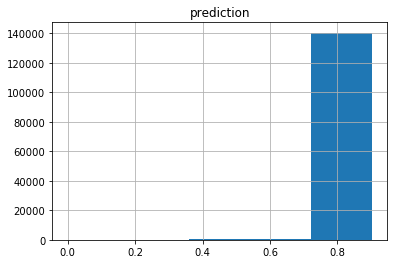

In [38]:
pred_df.hist(column='prediction', bins=5)

In [29]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179165 entries, 0 to 179164
Data columns (total 9 columns):
repo_id       179165 non-null int64
user_id       179165 non-null int64
created_at    179165 non-null int64
login         179165 non-null object
type          179165 non-null object
url           179165 non-null object
language      179165 non-null object
starred       179165 non-null int64
prediction    140930 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 12.3+ MB


In [39]:
#Missing predictions due to cold start 
179165 - 140930

38235

In [77]:
#evaluate.evaluate_recommender(als_model, spark_train_stars_df, spark_test_stars_df)

KeyError: 'rating'

## Implicit ALS model

In [10]:
import pyspark
from pyspark.sql import SparkSession
# from pyspark.ml.recommendation import ALS
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Setup a SparkSession
spark = SparkSession.builder.getOrCreate()


# from pyspark import SparkContext
# sc = SparkContext()

# import src_2.evaluate as evaluate

IllegalArgumentException: u"Error while instantiating 'org.apache.spark.sql.hive.HiveSessionState':"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
forks_and_stars = pd.read_pickle('data/pickled/forks_and_stars.pkl')
forks_and_stars.columns

Index([u'user_id', u'repo_id', u'forked', u'created_at', u'starred',
       u'interest_rank'],
      dtype='object')

In [5]:
def ordered_train_test_split(df, order_by, test_size=0.33):
    '''
    Takes a pandas dataframe and returns a train and test dataset ordered by the 
    column name passed to order_by and sliced up to the test_size
    INPUT:
    df: pandas df
    order_by: list or str of column names
    test_size: float percentage of df to use as test set
    OUTPUT:
    train: pandas dataframe
    test: pandas dataframe
    '''
    upto = int(df.shape[0] * (1 - test_size))
    df.sort_values(by=order_by, axis=0)
    train = forks_and_stars.iloc[:upto,:]
    test = forks_and_stars.iloc[upto:,:]
    return train, test

In [6]:
train_forks_stars, test_forks_stars = ordered_train_test_split(
    forks_and_stars, order_by=['created_at'], test_size=0.33)

In [7]:
train_forks_stars.shape

(681076, 6)

In [8]:
test_forks_stars.shape

(335456, 6)

In [9]:
sp_train_forks_stars = spark.createDataFrame(train_forks_stars)
sp_test_forks_stars = spark.createDataFrame(test_forks_stars)

NameError: name 'spark' is not defined

In [11]:
sp_train_forks_stars.withColumn('user_repo')

TypeError: withColumn() takes exactly 3 arguments (2 given)

In [45]:
user_train = tuple(train_forks_stars['user_id'])
repo_train = tuple(train_forks_stars['repo_id'])
interest_rank_train = tuple(train_forks_stars['interest_rank'])


In [48]:
ratings = Rating(user=sp_train_forks_stars.withColumn('user_repo'), 
                 product=repo_train, 
                 rating=interest_rank_train)

# ratings = spark.parallelize([user_train, repo_train, interest_rank_train])

AttributeError: 'SparkSession' object has no attribute 'parallelize'

In [40]:
model = ALS.trainImplicit(ratings=ratings, 
                          rank=15, 
                          iterations=5, 
                          nonnegative=True,
                          alpha=0.1)

TypeError: Ratings should be represented by either an RDD or a DataFrame, but got <class 'pyspark.mllib.recommendation.Rating'>.

In [ ]:

>>> model.predict(2, 2)

In [78]:
from sklearn.metrics import confusion_matrix

In [87]:
ALS_predictions = pd.read_csv('submissions/ALS.csv')
brians_mean_movie_rating = pd.read_csv('submissions/brian_avg_movie_rating.csv')

In [88]:
ALS_predictions.head()

,user,movie,prediction
0,53,148,NaN
1,4169,148,3.034759
2,5333,148,2.316155
3,4387,148,2.017670
4,840,148,2.425453


In [89]:
brians_mean_movie_rating.head()

,user,movie,rating
0,4958,1924,2.645714
1,4958,3264,3.110448
2,4958,2634,3.161290
3,4958,1407,3.637457
4,4958,2399,2.717391


In [96]:
ALS_predictions.describe()

,user,movie,prediction
count,200209.000000,200209.000000,104439.000000
mean,1511.751225,1930.586682,3.363050
std,1582.930564,1129.670350,0.664480
min,1.000000,1.000000,0.475375
25%,331.000000,1046.000000,2.950058
50%,752.000000,1946.000000,3.423546
75%,2131.000000,2890.000000,3.834524
max,6040.000000,3952.000000,5.428523


In [65]:
brians_mean_movie_rating.describe()

,user,movie,rating
count,200209.000000,200209.000000,200082.000000
mean,1511.751225,1930.586682,3.563625
std,1582.930564,1129.670350,0.550986
min,1.000000,1.000000,1.000000
25%,331.000000,1046.000000,3.241379
50%,752.000000,1946.000000,3.662857
75%,2131.000000,2890.000000,3.962349
max,6040.000000,3952.000000,5.000000


In [64]:
print "ALS Model Predicitons"
print ALS_predictions.info()
print "\n    Missing Predictions just running through ALS: {}%\n".format((104439./200209)*100)
print "Simple Predict the Mean Movie Rating"
print brians_mean_movie_rating.info()

ALS Model Predicitons
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200209 entries, 0 to 200208
Data columns (total 3 columns):
user          200209 non-null int64
movie         200209 non-null int64
prediction    104439 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB
None

    Missing Predictions just running through ALS: 52.164987588%

Simple Predict the Mean Movie Rating
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200209 entries, 0 to 200208
Data columns (total 3 columns):
user      200209 non-null int64
movie     200209 non-null int64
rating    200082 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB
None


In [68]:
ALS_join = pd.merge(ALS_predictions, brians_mean_movie_rating, how='left', on=["user","movie"])

In [69]:
ALS_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200209 entries, 0 to 200208
Data columns (total 4 columns):
user          200209 non-null int64
movie         200209 non-null int64
prediction    104439 non-null float64
rating        200082 non-null float64
dtypes: float64(2), int64(2)
memory usage: 7.6 MB


In [75]:
ALS_join['prediction'].fillna(value=ALS_join.rating, inplace=True)

In [76]:
ALS_join.head(10)

,user,movie,prediction,rating
0,53,148,2.700000,2.700000
1,4169,148,3.034759,2.700000
2,5333,148,2.316155,2.700000
3,4387,148,2.017670,2.700000
4,840,148,2.425453,2.700000
5,216,148,2.700000,2.700000
6,482,148,2.700000,2.700000
7,752,148,2.999931,2.700000
8,424,148,2.700000,2.700000
9,970,463,2.748142,2.821429


In [77]:
ALS_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200209 entries, 0 to 200208
Data columns (total 4 columns):
user          200209 non-null int64
movie         200209 non-null int64
prediction    200092 non-null float64
rating        200082 non-null float64
dtypes: float64(2), int64(2)
memory usage: 7.6 MB


In [ ]:
ALS_join = ALS_join.drop('rating', axis=1)

In [81]:
ALS_join = ALS_join.rename(columns={'prediction':'rating'})
ALS_join.head()

,user,movie,rating
0,53,148,2.700000
1,4169,148,3.034759
2,5333,148,2.316155
3,4387,148,2.017670
4,840,148,2.425453


In [84]:
ALS_join.to_csv('submissions/ALS_impute_Movie_Means1.csv', index=False)


In [86]:
!head 'submissions/ALS_impute_Movie_Means.csv'

user,movie,rating
53,148,2.7
4169,148,3.03475856781
5333,148,2.31615543365
4387,148,2.01766991615
840,148,2.42545342445
216,148,2.7
482,148,2.7
752,148,2.99993133545
424,148,2.7


In [90]:
brians_4 = pd.read_csv('submissions/brians_meanmovierating_userbias.csv')

In [92]:
brians_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200209 entries, 0 to 200208
Data columns (total 3 columns):
user      200209 non-null int64
movie     200209 non-null int64
rating    200209 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [94]:
new_predictions = pd.read_csv('submissions/ALS_with_imputing435.csv')
new_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200209 entries, 0 to 200208
Data columns (total 3 columns):
user      200209 non-null int64
movie     200209 non-null int64
rating    200209 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [95]:
new_predictions.describe()

,user,movie,rating
count,200209.000000,200209.000000,200209.000000
mean,1511.751225,1930.586682,3.472030
std,1582.930564,1129.670350,0.622423
min,1.000000,1.000000,0.475375
25%,331.000000,1046.000000,3.103139
50%,752.000000,1946.000000,3.555398
75%,2131.000000,2890.000000,3.920826
max,6040.000000,3952.000000,5.428523


## Model Performances

#### Predict every user rates the movie a 5
Rating of 3.54594448801

#### Predict the rating for every user using the mean movie rating for each movie
Rating of 4.27909532094

#### Predict the rating using ALS and imputing the missing values using the mean movie rating and more

Rating of 4.32845

In [97]:
4.32845 - 4.27909532094

0.04935467906000035